# Classic Gompertz 

https://en.wikipedia.org/wiki/Gompertz_function  

[*********************100%***********************]  1 of 1 completed


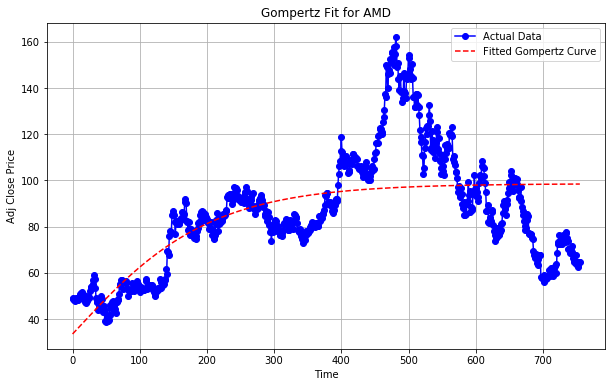

A: 98.62, B: 1.08, C: 0.01


In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gompertz function
def gompertz(x, A, B, C):
    return A * np.exp(-B * np.exp(-C * x))

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Fit the Gompertz model to the data
x = np.arange(len(data))
params, covariance = curve_fit(gompertz, x, data, p0=(max(data), 0.1, 0.1))

# Extract the parameters
A, B, C = params

# Generate the fitted curve
fitted_curve = gompertz(x, A, B, C)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x, data, label='Actual Data', marker='o', linestyle='-', color='blue')
plt.plot(x, fitted_curve, label='Fitted Gompertz Curve', linestyle='--', color='red')
plt.title(f'Gompertz Fit for {symbol}')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)

plt.show()

# Print the parameters
print(f'A: {A:.2f}, B: {B:.2f}, C: {C:.2f}')